# Aprendizado Supervisionado e K Vizinhos mais Próximos

## Introdução

Nós utilizaremos a base de dados de taxa de rejeição da indústria de telecomunicações para essa lista de exercícios. A base de dados tem o nome `Orange_Telecom_Churn_Data.csv`. Nesse notebook carregaremos a base de dados, faremos algum pré-processamento e usaremos a técnica k-NN para predizer a taxa de rejeição baseado nas características mensuradas.

## Exercício 1

* Comece importando os dados através do pandas. Examine as colunas e os dados
* Note que os dados contêm estado, código de área e telefone. Você acha que esses atributos são interessantes para construir nosso modelo de classificação? Por que?

Não utilizaremos esses atributos para essa base, então eles podem ser removidos do dataframe (método `drop`).

In [38]:
import pandas as pd

arquivo = 'data/Orange_Telecom_Churn_Data.csv'
df = pd.read_csv(arquivo)
#df.drop(columns=['state','area_code','phone_number'])
df.drop(['state', 'area_code', 'phone_number'], axis=1, inplace=True)
df

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,118,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,121,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,147,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,117,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,141,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


## Exercício 2

* Note que algumas das colunas são categóricas e algumas são *float*. Esses atributos precisam ser numéricos para usar os algoritmos que aprenderemos no curso.
* Finalmente, o algoritmo K-Vizinhos mais próximos necessita de dados escalonados. Escalone os dados utilizando um dos métodos aprendidos em aula.

In [39]:
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.preprocessing import MinMaxScaler, LabelBinarizer

bin_cols = ['intl_plan', 'voice_mail_plan', 'churned']
lb = LabelBinarizer()

for col in bin_cols:
    df[col]=lb.fit_transform(df[col])

mms=MinMaxScaler(feature_range=(0,1))

dfscaled=mms.fit_transform(df)
df

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,118,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,121,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
7,147,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
8,117,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
9,141,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0


## Exercício 3

* Separe as colunas de atributos (todas menos `churned`) da  coluna de rótulo (`churned`). Isso criará duas tabelas.
* Aplique o método `.fit()` do K-nearest neighbors com um valor de `n_neighbors=3` para essa base de dados e verifique o resultado com o método `.predict()` na mesma base.

In [41]:
x_cols = [x for x in df.columns if x != 'churned']

X_data = df[x_cols]
y_data = df['churned']

In [80]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)

knn.fit(X_data,y_data)
yi=knn.predict(X_data)

## Exercício 4

Ainda não ensinamos formas de medir o erro, mas a acurácia é um conceito simples de entender--é a porcentagem de rótulos que foram corretamente classificados:

$acc = \frac{corretos}{total}$

* Escreva uma função para calcular a acurácia usando os rótulos verdadeiros e os preditos.
* Usando a função, calcule a acurácia do K-nn nos dados.

In [88]:
def accuracy(real, predict):
    return sum(y_data == yi) / 5000

print(accuracy(y_data, yi))

0.9182


## Exercício 5

* Repita a aplicação do modelo K-nearest neighbors mas com o parâmetro `weights=distance`. Calcule a acurácia da função criada por você.
* Repita a aplicação do modelo com `n_neighbors=3`, `weights=uniform` e `p=1` para utilizar a distância de Manhattan. Verifique os resultados.

Quando as distâncias ponderadas são utilizadas para a parte 1 dessa questão, vocês obterão acurácia de 1.0. Por que isso ocorre? *Dica:* o KNN usa diretamente os dados para fazer a predição.

In [89]:
#weights=distance
knn=KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2,weights='distance')

knn.fit(X_data,y_data)
yi=knn.predict(X_data)

print(accuracy(y_data,yi))

1.0


In [90]:
#n_neighbors=3, weights=uniform e p=1
knn=KNeighborsClassifier(n_neighbors=3,p=1,weights='uniform')

knn.fit(X_data,y_data)
yi=knn.predict(X_data)

print(accuracy(y_data,yi))

0.9182


## Exercício 6

* Teste o modelo KNN utilizando valores de `n_neighbors` na faixa de 1 a 20. Deixe o restante dos parâmetros como o padrão. Armazene os valores de vizinhos e acurácia em uma lista no formato [(k, acuracia)].
* Plote um gráfico do tipo *scatter* da acurácia vs vizinhos. O que acontece com `n_neighbors=1`? Por que isso ocorre?

In [91]:
score_list = list()

'''escreva no bloco abaixo'''
for k in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_data,y_data)
    yi=knn.predict(X_data)
    acc=accuracy(y_data,yi)
    score_list.append((k,acc))
'''fim do código'''

score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])

In [92]:
# Import libraries to make the plot

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

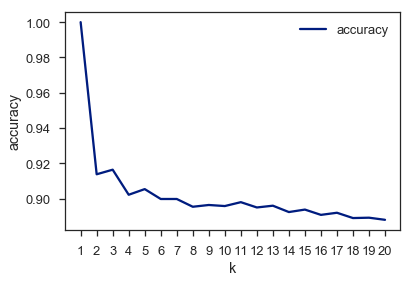

In [93]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = score_df.set_index('k').plot()

ax.set(xlabel='k', ylabel='accuracy')
ax.set_xticks(range(1, 21));